Homework 6 : YOUR NAME HERE
===

Steady State Error oand Performance

**<span style="color: darkgreen">Due Sunday May 5 at 11:59pm</span>**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook to canvas. 

In [2]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

# Comment out in Google colab 
init_printing(use_latex='mathjax')

#Uncomment in below Google colab to render sympy equations nicely
#def custom_latex_printer(exp,**options):
 #   from google.colab.output._publish import javascript
  #  url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
  #  javascript(url=url)
   # return printing.latex(exp,**options)
#init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

def center(plt):
    plt.gca().spines['left'].set_position('center')
    plt.gca().spines['bottom'].set_position('center')
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.gca().set_aspect('equal') 
    
def poles(plt,poles):
    center(plt)
    for p in poles:
        plt.plot([p[0]-0.1,p[0]+0.1],[p[1]-0.1,p[1]+0.1],'black')
        plt.plot([p[0]-0.1,p[0]+0.1],[p[1]+0.1,p[1]-0.1],'black')   
        plt.xlabel("Im", labelpad=100)
        plt.ylabel("Re", labelpad=140)    

**Relevant Reading**

Read up on steady state error and performance in Nise for more background.

# 1. Performance with a zero

Show that any transfer function $G(s)$ with two complex poles ard one zero can be written in the form

$$
s T(s) + a T(s)
$$

where $T(s)$ is the archetypal 2nd order system discussed in the notes on Second Order systems.

a) Using the step response of $T(s)$ and its derivative, write down
  the step response of $G(s)$.

b) Determine a state space representation of $G(s)$ using the same
  $A$ matrix we used in the notebook second order systems (May 6) -- see the definition of Tcheck
  in the Step Response section.
  Show that your state representation
  gives you the right transfer function (note: this subproblem is just a curiosity and does
  not help with the next two parts).

c) Find expressions for the peak time and percent overshoot for
  $G(s)$ given a step input.  Compare these to the peak time and
  percent overshoot for $T(s)$.

d) Plot the step response of the transfer function
$$
\frac{s+2}{s^2+s+1}
$$
and plot the response of $T(s)$ on the same axis and point out the
differences predicted by your analysis.


In [11]:
# Declare variables
var("s")
var("w z t b a tau theta", real=True, positive=True)
T = (w**2)/(s**2 + 2*z*w*s + w**2)

G = s*T+a*T
G.simplify()

     2           
    w ⋅(a + s)   
─────────────────
 2              2
s  + 2⋅s⋅w⋅z + w 

a. Step response :
$$y(t) = 1 - \frac{1}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t + \theta)$$
sT(s) is the derivative of T(s) in time domain, so
$$G(t) =  \frac{\zeta \omega}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t + \theta)- \omega e^{-\zeta \omega t} \cos(\omega \beta t + \theta)+ a( 1 - \frac{1}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t + \theta))$$


In [12]:
#B, 
# Can represent the system in state space though
A = Matrix([
    [-w*z, -w*b],
    [w*b,-w*z]
])
B=Matrix([
    [(a+s)*w],
    [0]
])
C = Matrix([[0,1/b]])
Tcheck = C*(s*eye(2)-A).inv()*B
Tcheck = Tcheck.subs(b,sqrt(1-z**2))
Tcheck.simplify()
Tcheck

⎡     2           ⎤
⎢    w ⋅(a + s)   ⎥
⎢─────────────────⎥
⎢ 2              2⎥
⎣s  + 2⋅s⋅w⋅z + w ⎦

In [13]:
Gcheck = a*Tcheck + s*Tcheck 
Gcheck.simplify()
Gcheck

⎡    2        2   ⎤
⎢   w ⋅(a + s)    ⎥
⎢─────────────────⎥
⎢ 2              2⎥
⎣s  + 2⋅s⋅w⋅z + w ⎦

In [14]:
print(Gcheck[0] == G)
#WHAT? 
G,Gcheck[0]

False


⎛          2                   2            2        2   ⎞
⎜       a⋅w                 s⋅w            w ⋅(a + s)    ⎟
⎜───────────────── + ─────────────────, ─────────────────⎟
⎜ 2              2    2              2   2              2⎟
⎝s  + 2⋅s⋅w⋅z + w    s  + 2⋅s⋅w⋅z + w   s  + 2⋅s⋅w⋅z + w ⎠

In [15]:
var("beta zeta omega t theta",real = true,positive = true)
Y = (1-1/beta*exp(-zeta*omega*t)*sin(omega*beta*t+theta))
dY = diff(Y,t)

G = dY + a*Y
G

  ⎛     -ω⋅t⋅ζ               ⎞                                   -ω⋅t⋅ζ       
  ⎜    ℯ      ⋅sin(β⋅ω⋅t + θ)⎟      -ω⋅t⋅ζ                  ω⋅ζ⋅ℯ      ⋅sin(β⋅
a⋅⎜1 - ──────────────────────⎟ - ω⋅ℯ      ⋅cos(β⋅ω⋅t + θ) + ──────────────────
  ⎝              β           ⎠                                          β     

        
ω⋅t + θ)
────────
        

In [16]:
# Can represent the system in state space though
A = Matrix([
    [-w*z, -w*b],
    [w*b,-w*z]
])
B=Matrix([
    [(a+s)*w],
    [0]
])
C = Matrix([[0,1/b]])
A,B,C

⎛⎡-w⋅z  -b⋅w⎤  ⎡w⋅(a + s)⎤  ⎡   1⎤⎞
⎜⎢          ⎥, ⎢         ⎥, ⎢0  ─⎥⎟
⎝⎣b⋅w   -w⋅z⎦  ⎣    0    ⎦  ⎣   b⎦⎠

Taking the derivative of G(t): 
$$G(t) =  \frac{\zeta \omega}{\beta} (-\zeta \omega e^{\zeta \omega t} \sin(\omega \beta t + \theta)+ \omega \beta e^{-\zeta \omega t} \sin(\omega \beta t + \theta) +\omega(\omega(-\zeta \omega e^{-\zeta \omega t} \cos(\omega \beta + \theta) + \beta \omega e^{\zeta \omega t} \sin(\omega \beta t \theta)- a( \frac{\zeta \omega}{\beta} e^{-\zeta \omega t} \cos(\omega \beta t + \theta)- \omega e^{-\zeta \omega t} \cos(\omega \beta t + \theta))$$


In [17]:
dG = diff(G,t)
dG
[g1,g2] = solve(dG, t)


In [18]:
[g1,g2,dG]

⎡ ⎛          ⎛                       _________    ____________________________
⎢ ⎜          ⎜       2        2     ╱  2    2    ╱  2              2  2    2  
⎢ ⎜          ⎜a⋅ζ + β ⋅ω - ω⋅ζ  - ╲╱  β  + ζ  ⋅╲╱  a  - 2⋅a⋅ω⋅ζ + β ⋅ω  + ω ⋅ζ
⎢-⎜θ + 2⋅atan⎜────────────────────────────────────────────────────────────────
⎢ ⎝          ⎝                          β⋅(a - 2⋅ω⋅ζ)                         
⎢─────────────────────────────────────────────────────────────────────────────
⎣                                       β⋅ω                                   

__⎞⎞    ⎛          ⎛                       _________    ______________________
2 ⎟⎟    ⎜          ⎜       2        2     ╱  2    2    ╱  2              2  2 
  ⎟⎟    ⎜          ⎜a⋅ζ + β ⋅ω - ω⋅ζ  + ╲╱  β  + ζ  ⋅╲╱  a  - 2⋅a⋅ω⋅ζ + β ⋅ω  
──⎟⎟   -⎜θ + 2⋅atan⎜──────────────────────────────────────────────────────────
  ⎠⎠    ⎝          ⎝                          β⋅(a - 2⋅ω⋅ζ)                   
─────, ────────────────────────────────────────────

In [19]:
Ga = G.subs(t,g1)
Ga
#so the Percent Overshoot is M_p - steady-state value 
#the steady-state value is a

Gaa = Ga -a
Gaa

  ⎛       ⎛          ⎛                       _________    ____________________
  ⎜       ⎜          ⎜       2        2     ╱  2    2    ╱  2              2  
  ⎜       ⎜          ⎜a⋅ζ + β ⋅ω - ω⋅ζ  - ╲╱  β  + ζ  ⋅╲╱  a  - 2⋅a⋅ω⋅ζ + β ⋅ω
  ⎜     ζ⋅⎜θ + 2⋅atan⎜────────────────────────────────────────────────────────
  ⎜       ⎝          ⎝                          β⋅(a - 2⋅ω⋅ζ)                 
  ⎜     ──────────────────────────────────────────────────────────────────────
  ⎜                                             β                             
  ⎜    ℯ                                                                      
  ⎜                                                                           
a⋅⎜1 + ───────────────────────────────────────────────────────────────────────
  ⎝                                                                           

__________⎞⎞                                                                  
2    2  2 ⎟⎟                                       

In [20]:
Gaa_percentOvershoot = Gaa.subs(beta,sqrt(1-zeta**2)).subs(theta,acos(zeta)).subs(a,2).subs(zeta,0.5).subs(omega,1)+2
abs(Gaa_percentOvershoot)


0.343407433560547

From the Lecture notes we know that the percent overshoot for T is 
$$
y(t) = 1 - \frac{1}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t + \theta).
$$


The percent overshoot is just $M_p-1$ or 

$$
\mathrm{P.O.} = e^{-\zeta \frac{\pi}{\beta}}
$$
Plug in the value we calculated in part D: $\zeta = 0.5, \beta = \sqrt{1-\zeta^2}$$

$$P.O = e^{-0.5*\frac{\pi}{\sqrt{1-0.25}}} = 0.163$$
for the G(s): 

compare to the graph in the problem d, the result matches the graph. so this is the percent overshoot.

D. 

In [21]:
#beta zeta omega t theta
Gg = G.subs(beta,sqrt(1-zeta**2)).subs(theta,acos(zeta)).subs(a,2).subs(zeta,0.5).subs(omega,1)
Gg
Yy = Y.subs(beta,sqrt(1-zeta**2)).subs(theta,acos(zeta)).subs(zeta,0.5).subs(omega,1)
Yy

                      -0.5⋅t                                           
1 - 1.15470053837925⋅ℯ      ⋅sin(0.866025403784439⋅t + 1.0471975511966)

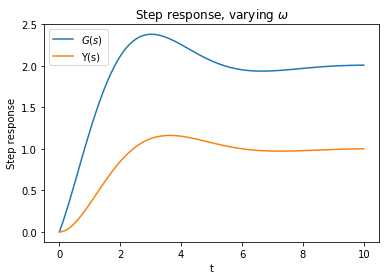

In [22]:
#
# Fixed zeta, varying omega
#
tvals = np.linspace(0,10,100)
fg = lambdify(t,Gg,'numpy')
plt.plot(tvals,fg(tvals),label="$G(s)$ ") 
ft = lambdify(t,Yy,'numpy')
plt.plot(tvals,ft(tvals),label="Y(s)" )
plt.xlabel("t")
plt.ylabel("Step response")
plt.title("Step response, varying $\omega$")
plt.legend();

# 2. Controller Design

Consider the transfer function 

$$
G(s) = \frac{10}{s+1}.
$$

Find a negative feedback controller with at least two tunable gains
that (1) results in zero steady state error (and show why it works);
(2) Gives a settling time of 4 seconds; (3) has 10% overshoot. Use
the standard 2nd order approximation. Plot the step response of the
system and compare the standard approximation with the plot.

Consider a system with the following block diagram:


<img width=40% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/test-signal-control.png">
So we set that the $G_c(s) =K_p+ K_I/s$. so the total transfer function
$$ T = \frac{(K_p+\frac{K_I}{s})*G(s)}{1+((K_p+\frac{K_I}{s}))(G(s))}$$
$$= \frac{((K_p+\frac{K_I}{s}))(\frac{10}{s+1})}{1+((K_p+\frac{K_I}{s}))(\frac{10}{s+1})}  $$
$$\frac{10(K_I+K_ps)}{s^2+((10K_p+1)s+10K_I}  $$

compare to the form $$T =  \frac{\omega^2}{s^2+2\zeta \omega s +\omega^2}$$

As we did in problem 1, the equation can decomposite into: 
$$Y =  T(s) + \frac{K_p}{K_I}sT(s)$$. 

so $\omega^2 = 10K_I$, $10k_p+1 = 2\zeta \omega$.
So with the parameterized standard form, we can relate this to the given specification: 
<br>
$e(\infty) = 0 $: that's why I choose $G_c(s) =K_p K_I/s$ based on the lecture notes, and I'll check it later. ;
<br>
settling  time $T_s$ = 4: $T_s = 4* \frac{1}{\zeta \omega}= 4$ 
***
Percent Overshoot = 0.1: P.O. = $e^{-\zeta \frac{\pi}{\beta}}= 0.1$
***
Solving these equations we get : $ \zeta\omega = 1$, $\zeta = \frac{1}{\omega} = \frac{1}{\sqrt{10K_I}}$. 
<br> 
since $\zeta \omega = 1, so 10K_p+1 =2, so K_p = 0.1;$ 
plug in to the percent overshoot formula: P.O = 0.1 =$ e^{-\zeta\frac{\pi}{\beta}}$ where $\beta =\sqrt{ 1-\zeta^2}$:
$$ \zeta = -1.892,0.528$$ since it's under squareroot, we choose 0.528. So $\zeta = 0.528$, $\omega = 1/\zeta = 1.894$, so $\omega^2 = 3.587 = 10K_I$, so $K_I = 0.3587.$  
<br>
So plugging in the values into the transfer function: 

$$T(s) =  \frac{3.587}{s^2+2s +3.587}$$
and the total transfer function : 
$$Y = T(s) + \frac{K_p}{K_I}sT(s) \frac{3.587}{s^2+2s +3.587}+\frac{s}{s^2+2s +3.587} = \frac{3.587+s}{s^2+2s +3.587}$$ 

Below is the graph for the standard approximation and the step response. As we can see, the overshoot is about 0.1 and the settling time is 4s. 
<br>
check for the steady-state error: $$
e(\infty) = \lim_{s \rightarrow \infty} s(R(s)-Y(s)) = s(1-\frac{3.587+s}{s^2+2s+3.587}) = 0. 
$$
which meets the specificaiton of the question. 

In [23]:
#the step response of the system.
Sr = 1/s*(3.587+s)/(s**2+s+3.587)
Yr = inverse_laplace_transform(Sr, s, t)
Yr

    ╭─╮0, 4 ⎛-3.587, 1, 0.5 - 1.82674574038097⋅ⅈ, 0.5 + 1.82674574038097⋅ⅈ    
1.0⋅│╶┐     ⎜                                                                 
    ╰─╯4, 4 ⎝                                                               -2

                                                              │  t⎞
                                                              │ ℯ ⎟
.587, 0, -0.5 - 1.82674574038097⋅ⅈ, -0.5 + 1.82674574038097⋅ⅈ │   ⎠

## Since the plotting method cannot recognize the result above, I choose to use calculator to get the inverse laplace transform. 

In [3]:
tvals = np.linspace(0,10,100)

#beta zeta omega t theta
## Inverse Laplace transform of step response
Ts = 1-exp(-t/2)*(cos(1.8268*t)+0.27371078*sin(1.82675*t))
T = Y.subs(beta,sqrt(1-zeta**2)).subs(theta,acos(zeta)).subs(zeta,0.528).subs(omega,1.894)
T
# Fixed zeta, varying omega
#
fg = lambdify(t,T,'numpy')
fy = lambdify(t,Ts,'numpy')
plt.plot(tvals,fg(tvals),label="standard approximation ") 
plt.plot(tvals,fy(tvals),label = "Step response")
plt.xlabel("t")
plt.ylabel("amplitude ")
plt.title("Standard approximation and Step response ")
plt.legend();


NameError: name 't' is not defined

As we can see, the step response is more unstable than the standard approximation, but their steady-state reach to the same value finally. 

# 3. Sensitivity Revisited

Determine a formula for the
sensitivity of the percent overshoot of the controlled system to each
of the gains in your controller for problem (2). To which gain is the
system more sensitive? Repeat for the sensitivity of the settling
time. Plot these sensitivities in two plots. First, plot the sensitivity of P.O. to 
gain one. Overlay several plots of that sensitivity, each one for a different value of gain two. 
Second, make a similar plot of the sensitivity of P.O. to gain two.

The percent overshoot formula of the overall parameterized system: 
$$Y(s) = \frac{10(K_I+K_ps)}{s^2+((10K_p+1)s+10K_I} = T(s) + \frac{K_p}{K_I}sT(s) = (1+\frac{K_p}{K_I}s)T(s)$$
From the standard form of the second order system: 
$$
y(t) = 1 - \frac{1}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t + \theta).
$$
where  $\omega^2 = 10K_I$, $10K_p+1 = 2\zeta \omega,\theta = \cos^{-1} \zeta .and \beta =\sqrt{ 1-\zeta^2}$.
<br>
so $Y(s) = \frac{K_p}{K_I}dy+y$ 
=

The percent overshoot formula: $$P.O = e^{-\zeta\frac{\pi}{\beta}}$$ 


In [4]:
var("beta zeta omega t theta K_p K_I",real = true,positive = true)
po = exp(-zeta*np.pi/beta)
po= po.subs(beta,(1-zeta**2)**0.5).subs(zeta,(10*K_p+1)/(2*(10*K_I)**0.5))
po

                                                                          -0.5
                       -0.5             ⎛           -1.0            2    ⎞    
 -0.496729413289805⋅K_I    ⋅(10⋅Kₚ + 1)⋅⎝- 0.025⋅K_I    ⋅(10⋅Kₚ + 1)  + 1⎠    
ℯ                                                                             

In [5]:
Spop = diff(po,K_p)*K_p/po
Spop

   ⎛                                                                          
   ⎜                         -1.5                           ⎛           -1.0  
Kₚ⋅⎝- 0.00620911766612256⋅K_I    ⋅(10⋅Kₚ + 1)⋅(200⋅Kₚ + 20)⋅⎝- 0.025⋅K_I    ⋅(

                -1.5                                                          
          2    ⎞                           -0.5 ⎛           -1.0            2 
10⋅Kₚ + 1)  + 1⎠     - 4.96729413289805⋅K_I    ⋅⎝- 0.025⋅K_I    ⋅(10⋅Kₚ + 1)  

    -0.5⎞
   ⎞    ⎟
+ 1⎠    ⎠

In [6]:
Spoi = diff(po,K_I)*K_I/po
Spoi

    ⎛                                                                         
    ⎜                       -2.5            3 ⎛           -1.0            2   
K_I⋅⎝0.00620911766612256⋅K_I    ⋅(10⋅Kₚ + 1) ⋅⎝- 0.025⋅K_I    ⋅(10⋅Kₚ + 1)  + 

  -1.5                                                                        
 ⎞                            -1.5             ⎛           -1.0            2  
1⎠     + 0.248364706644903⋅K_I    ⋅(10⋅Kₚ + 1)⋅⎝- 0.025⋅K_I    ⋅(10⋅Kₚ + 1)  +

   -0.5⎞
  ⎞    ⎟
 1⎠    ⎠

In [7]:
sqrt(3)

√3

In [12]:
def spop(kp,Ki): 
    return kp*(-sqrt(10)*pi/(2*sqrt(Ki)*sqrt(1-((10*kp)+1)**2/(40*Ki))) + sqrt(10)*pi*(10*kp+1)*(200*kp+20)/(1600*Ki**1.5*sqrt(1-((10*kp)+1)**2/(40*Ki))**3))


C:\Users\Villy\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in power
  """
No handles with labels found to put in legend.


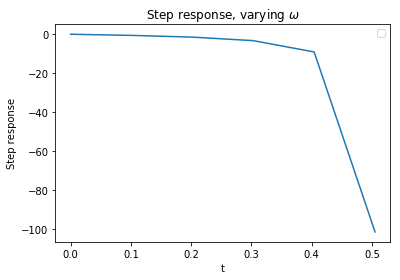

In [13]:
kp = np.linspace(0,10,100)
f = lambdify(K_p,Spop.subs(K_I, 1),'numpy')
plt.plot(kp,f(kp))
plt.xlabel("t")
plt.ylabel("Step response")
plt.title("Step response, varying $\omega$")
plt.legend();

C:\Users\Villy\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  """
C:\Users\Villy\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in power
  """
C:\Users\Villy\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in power
  """
C:\Users\Villy\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in multiply
  """
No handles with labels found to put in legend.


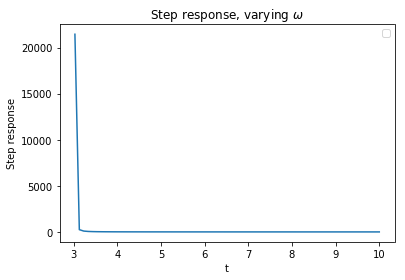

In [15]:
ki = np.linspace(0,10,100)
f = lambdify(K_I,Spoi.subs(K_p, 1),'numpy')
plt.plot(ki,f(ki))
plt.xlabel("t")
plt.ylabel("Step response")
plt.title("Step response, varying $\omega$")
plt.legend();

I don't know where does this error come from; I searched online for hours but I couldn't solve this problem. 

In [37]:
Ts = 1/(zeta*omega)
Ts= Ts.subs(beta,sqrt(1-zeta**2)).subs(zeta,(10*K_p+1)/(2*omega)).subs(omega,2*sqrt(10*K_I))

Ts


    2    
─────────
10⋅Kₚ + 1

In [38]:
Stsp = diff(Ts,K_p)*K_p/Ts
Stsp

-20⋅Kₚ⋅(5⋅Kₚ + 1/2) 
────────────────────
               2    
    (10⋅Kₚ + 1)     

In [39]:
Stsi = diff(Ts,K_I)*K_I/Ts
Stsi

0

So we can see that the settling time is only related to $K_P$, so it's more sensitive to K_P. 

Text(0.5, 1.0, 'Sensitivity of settling time against $K_p$')

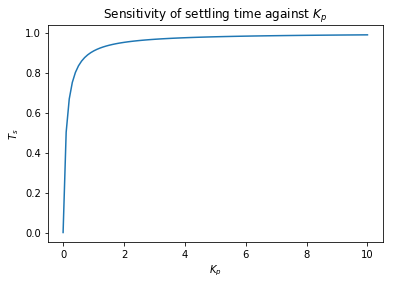

In [11]:
kp = np.linspace(0,10,100)
f = abs(-20*kp*(5*kp+0.5)/(10*kp+1)**2)
plt.plot(kp,f)
plt.xlabel("$K_p$")
plt.ylabel("$T_s$")
plt.title("Sensitivity of settling time against $K_p$")

As we can see, the sensitivity is 0 when Kp = 0; and stablizes to 1 as Kp increases.  